Version = 1.0.0

# TD1 - Fouille de textes
Pré-traitement avec spaCy et NLTK

# Introduction
Comme vu en cours, le processus de normalisation est la première étape souvent indispensable dans
le cadre de traitement automatique de documents textuels. Les performances de systèmes
automatiques sont souvent corrélées à la qualité de ce pré-traitement : une normalisation différente
produira généralement des résultats différents. Notons cependant qu’il n’existe pas une manière de
normaliser des documents textuels, mais que celle-ci doit être adaptée au(x) type(s) de documents
traité(s) / tâche(s) visée(s). Dans tous les cas, des « recettes » peuvent être suivies, impliquant
différents changements dans le texte (retrait des mots peu fréquents, normalisation des nombres/
dates, lemmatisation…).
Dans le cadre de ce TD, nous allons explorer deux bibliothèques (parmi les plus connues et
manipulées) permettant de réaliser différentes normalisation au niveau du texte. Bien entendu, il est
toujours possible de créer ses propres scripts de normalisation (et aussi d’en ajouter), l’avantage
étant surtout ici de tirer profit d’un processus standard en traitement automatique du langage (TAL)
qui ne devrait, au final, nécessiter peu de développement.

# Framework NLTK
NLTK est une bibliothèque logicielle pour le TAL, permettant entre autres, de normaliser des
documents textuels, mais également de fournir des outils permettant d’ajouter des metainformations
à partir du texte (étiquetage morpho-syntaxique, détection d’entités nommées,
regroupements de mots (chunks)…). Les différences entre les framework se situent surtout dans les
approches suivies (méthodologiques et techniques), impliquant des temps de traitement et des
performances différents.
Le code source est distribué sous licence Apache 2.0.

# Framework spaCy
Tout comme NLTK, SpaCy est une boîte à outils en TAL permettant de réaliser des traitements
quasi-similaires à ceux proposés par NLTK. Historiquement, plusieurs différences existaient entre
ces 2 librairies (rapidité de traitement, utilisation d’approches par réseaux de neurones, peu de
langages pour SpaCy…) mais ces différences se sont largement réduites ces dernières années, les
deux bibliothèques ayant toutes deux une communauté très active (par exemple, spaCy est passé de
7 à +de 50 langages supportés).
Le code source est distribué sous licence MIT. De nombreuses ressources sont disponibles pour son
utilisation, notamment à travers le site Internet de l’outil.

# Mise en place de l’environnement de travail
Le TD sera réalisé en langage Python, ici sous la version Python 3.
1/2
Master 2 ATAL - Module X3ITM10 - Nantes Université - Le Mans Université
De nombreuses ressources existent pour l’installation des librairies. Le plus simple est de se rendre
sur le site officiel de chaque librairie :
- SpaCy : https://spaCy.io/usage
- NLTK : https://www.nltk.org/install.html (les données à installer son disponible ici : http://
www.nltk.org/data.html)

# Travail à faire
Votre travail va donc consister à réaliser un pré-traitement / normalisation sur les données qui vous
seront fournies. Les données sont disponibles à l’adresse : https://uncloud.univ-nantes.fr/index.php/
s/YwMesLtR29SFF7m

Vous rendrez votre par courriel à l’adresse suivante : richard.dufour@univ-nantes.fr

Vous enverrez une archive au format .zip contenant :
- Le code source de votre travail. Merci de respecter les codes des questions en commentaire dans
le code (ex : question 1a, 1b…).
- Un court rapport répondant aux questions posées.

## 1. Pré-traitement sur des commentaires de films (td1_commentaires_data.txt)

### a) Vous devez pré-traiter les données avec NLTK selon les processus suivants en premier lieu :
segmentation en phrases et en mots, racinisation, suppression des mots vides.

In [1]:
import pandas as pd
import nltk
import re

In [2]:
# read text file and add it in a list 
with open ('td1_commentaires_data.txt', encoding='utf-8') as file:
    list_text=(file.readlines())

# create dataframe with this list
df = pd.DataFrame(list_text, columns =['Commentaire'])
df.head()

Commentaire
0  "Ce n'est pas ce qui se trouve en face de vous...
1  (...) En soi, je n'ai rien contre ce genre de ...
2  Pour sa troisième réalisation après "Tron, l'h...
3  Joseph Kosinski offre de nouvelles images ébou...
4  J'ai vu un film... qui traite d'un drame humai...

#### * segmentation en phrases

In [3]:
# visualize first comment in sentence
df.Commentaire[0]

'"Ce n\'est pas ce qui se trouve en face de vous, c\'est qui se tient à côté de vous". Cette phrase qui est la tagline du film veut tout dire et le résume parfaitement. Pour son premier film qui n\'est pas un de science-fiction, Joseph Kosinski s\'intéresse à ces pompiers d\'élite en tant que professionnels, mais surtout en tant qu\'hommes. Il dresse un très beau portrait d\'une bande de potes prêts à tout sacrifier pour protéger leur environnement des flammes. Le film est davantage centré sur le quotidien de ces héros qui font face à de nombreux dilemmes, mais cela n\'empêche pas que les scènes de terrain soient aussi superbes que terribles et surtout vraiment impressionnantes comme en témoigne notamment cet excellent final. C\'est une histoire inspirée de faits réels donc si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir à travers le film, l\'expérience sera bien plus forte et efficace. C\'est un très bon film avec une histoire puissante et pleine d\'hu

In [4]:
# tokenize first sentence
nltk.sent_tokenize(df.Commentaire[0])

['"Ce n\'est pas ce qui se trouve en face de vous, c\'est qui se tient à côté de vous".',
 'Cette phrase qui est la tagline du film veut tout dire et le résume parfaitement.',
 "Pour son premier film qui n'est pas un de science-fiction, Joseph Kosinski s'intéresse à ces pompiers d'élite en tant que professionnels, mais surtout en tant qu'hommes.",
 "Il dresse un très beau portrait d'une bande de potes prêts à tout sacrifier pour protéger leur environnement des flammes.",
 "Le film est davantage centré sur le quotidien de ces héros qui font face à de nombreux dilemmes, mais cela n'empêche pas que les scènes de terrain soient aussi superbes que terribles et surtout vraiment impressionnantes comme en témoigne notamment cet excellent final.",
 "C'est une histoire inspirée de faits réels donc si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir à travers le film, l'expérience sera bien plus forte et efficace.",
 "C'est un très bon film avec une histoire puissante

In [5]:
# tokenize all comments and add them into the dataframe as a columnb
liste_phrase = []
for i in range(len(df)):
    liste_phrase.append(nltk.sent_tokenize(df.Commentaire[i]))
    
df["phrases"] = liste_phrase
df.head()

Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  
0  ["Ce n'est pas ce qui se trouve en face de vou...  
1  [(...) En soi, je n'ai rien contre ce genre de...  
2  [Pour sa troisième réalisation après "Tron, l'...  
3  [Joseph Kosinski offre de nouvelles images ébo...  
4  [J'ai vu un film... qui traite d'un drame huma...

#### * segmentation en mots

In [6]:
# tokenize first comment in words
liste_mots = nltk.word_tokenize(df.Commentaire[0])
print(liste_mots)

['``', 'Ce', "n'est", 'pas', 'ce', 'qui', 'se', 'trouve', 'en', 'face', 'de', 'vous', ',', "c'est", 'qui', 'se', 'tient', 'à', 'côté', 'de', 'vous', "''", '.', 'Cette', 'phrase', 'qui', 'est', 'la', 'tagline', 'du', 'film', 'veut', 'tout', 'dire', 'et', 'le', 'résume', 'parfaitement', '.', 'Pour', 'son', 'premier', 'film', 'qui', "n'est", 'pas', 'un', 'de', 'science-fiction', ',', 'Joseph', 'Kosinski', "s'intéresse", 'à', 'ces', 'pompiers', "d'élite", 'en', 'tant', 'que', 'professionnels', ',', 'mais', 'surtout', 'en', 'tant', "qu'hommes", '.', 'Il', 'dresse', 'un', 'très', 'beau', 'portrait', "d'une", 'bande', 'de', 'potes', 'prêts', 'à', 'tout', 'sacrifier', 'pour', 'protéger', 'leur', 'environnement', 'des', 'flammes', '.', 'Le', 'film', 'est', 'davantage', 'centré', 'sur', 'le', 'quotidien', 'de', 'ces', 'héros', 'qui', 'font', 'face', 'à', 'de', 'nombreux', 'dilemmes', ',', 'mais', 'cela', "n'empêche", 'pas', 'que', 'les', 'scènes', 'de', 'terrain', 'soient', 'aussi', 'superbes', 

In [7]:
# tokenize all comments in words and add them into the dataframe as a column
liste_mots = []
for i in range(len(df)):
    liste_mots.append(nltk.word_tokenize(df.Commentaire[i]))
    
df["mots"] = liste_mots
df.head()

Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  ["Ce n'est pas ce qui se trouve en face de vou...   
1  [(...) En soi, je n'ai rien contre ce genre de...   
2  [Pour sa troisième réalisation après "Tron, l'...   
3  [Joseph Kosinski offre de nouvelles images ébo...   
4  [J'ai vu un film... qui traite d'un drame huma...   

                                                mots  
0  [``, Ce, n'est, pas, ce, qui, se, trouve, en, ...  
1  [(, ..., ), En, soi, ,, je, n'ai, rien, contre...  
2  [Pour, sa, troisième, réalisation, après, ``, ...  
3  [Joseph, Kosinski, offre, de, nouvelles, image...  
4  [J'ai, vu, un, film, ..., qui, traite, d'un, d...

#### * racinisation

supprimer les ponctuation

In [8]:
from nltk import PorterStemmer

liste_racines = []

ps = PorterStemmer()
for mots in liste_mots:
    liste_racine = []
    mots_sans_ponc = re.sub(r'[^\w\s]', '', ' '.join(mots))
    for mot in mots_sans_ponc.split():
        liste_racine.append(ps.stem(mot.lower()))
        
    liste_racines.append(liste_racine)
        
df["racines"] = liste_racines
df.head()

Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  ["Ce n'est pas ce qui se trouve en face de vou...   
1  [(...) En soi, je n'ai rien contre ce genre de...   
2  [Pour sa troisième réalisation après "Tron, l'...   
3  [Joseph Kosinski offre de nouvelles images ébo...   
4  [J'ai vu un film... qui traite d'un drame huma...   

                                                mots  \
0  [``, Ce, n'est, pas, ce, qui, se, trouve, en, ...   
1  [(, ..., ), En, soi, ,, je, n'ai, rien, contre...   
2  [Pour, sa, troisième, réalisation, après, ``, ...   
3  [Joseph, Kosinski, offre, de, nouvelles, image...   
4  [J'ai, vu, un, film, ..., qui, traite, d'un, d...   

                                             racines  
0  [ce, nest, pa, ce, qui, se, trouv, en, face, d...  
1  [en, soi, je, nai, rien, contr, ce, genr, de, ...  
2  [pour, sa, troisièm, réalis, aprè, tron, lhéri...  
3  [joseph, kosinski, offr, de, nouvel, imag, ébo...  
4  [jai, vu, un, film, qui, trait, dun, drame, hu...

#### * suppression des mots vides

In [9]:
from nltk.corpus import stopwords

fr_stopwords = stopwords.words('french')
print(fr_stopwords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [10]:
# use words list and lowercase words 
def remove_stopwords(tokens: list, fr_stopwords: list):
    tokens_without_sw = []
    for token in tokens:
        if token.lower() not in fr_stopwords:
            tokens_without_sw.append(token.lower())
    return tokens_without_sw

In [11]:
liste_tokens_without_sw = []
for i in range(len(df)):
    liste_tokens_without_sw.append(remove_stopwords(df.mots.iloc[i], fr_stopwords))
    
df['token_without_sw'] = liste_tokens_without_sw
df.head()

Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  ["Ce n'est pas ce qui se trouve en face de vou...   
1  [(...) En soi, je n'ai rien contre ce genre de...   
2  [Pour sa troisième réalisation après "Tron, l'...   
3  [Joseph Kosinski offre de nouvelles images ébo...   
4  [J'ai vu un film... qui traite d'un drame huma...   

                                                mots  \
0  [``, Ce, n'est, pas, ce, qui, se, trouve, en, ...   
1  [(, ..., ), En, soi, ,, je, n'ai, rien, contre...   
2  [Pour, sa, troisième, réalisation, après, ``, ...   
3  [Joseph, Kosinski, offre, de, nouvelles, image...   
4  [J'ai, vu, un, film, ..., qui, traite, d'un, d...   

                                             racines  \
0  [ce, nest, pa, ce, qui, se, trouv, en, face, d...   
1  [en, soi, je, nai, rien, contr, ce, genr, de, ...   
2  [pour, sa, troisièm, réalis, aprè, tron, lhéri...   
3  [joseph, kosinski, offr, de, nouvel, imag, ébo...   
4  [jai, vu, un, film, qui, trait, dun, drame, hu...   

                                    token_without_sw  
0  [``, n'est, trouve, face, ,, c'est, tient, côt...  
1  [(, ..., ), soi, ,, n'ai, rien, contre, genre,...  
2  [troisième, réalisation, après, ``, tron, ,, l...  
3  [joseph, kosinski, offre, nouvelles, images, é...  
4  [j'ai, vu, film, ..., traite, d'un, drame, hum...

### b) Proposez un étiquetage morpho-syntaxique (POS tagging). 
Attention à bien réfléchir à quel niveau de normalisation vous devez l’appliquer.

* Personal notes
- The list of POS tags is as follows, with examples of what each POS stands for.
- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’
- JJS adjective, superlative ‘biggest’
- LS list marker 1)
- MD modal could, will
- NN noun, singular ‘desk’
- NNS noun plural ‘desks’
- NNP proper noun, singular ‘Harrison’
- NNPS proper noun, plural ‘Americans’
- PDT predeterminer ‘all the kids’
- POS possessive ending parent’s
- PRP personal pronoun I, he, she
- PRP(dollar) possessive pronoun my, his, hers
- RB adverb very, silently,
- RBR adverb, comparative better
- RBS adverb, superlative best
- RP particle give up
- TO, to go ‘to’ the store.
- UH interjection, errrrrrrrm
- VB verb, base form take
- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
- WDT wh-determiner which
- WP wh-pronoun who, what
- WP(dollar) possessive wh-pronoun whose
- WRB wh-abverb where, when

supprimer la ponctuation

In [12]:
# pos tag sans changer les lettres en majuscule
liste_pos_tag = []

for i in range(len(df)):
    mots_sans_ponc = re.sub(r'[^\w\s]', '', ' '.join(df.mots.iloc[i]))
    liste_pos_tag.append(nltk.pos_tag(mots_sans_ponc.split()))
    
df['pos_tag'] = liste_pos_tag
df.head()

Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  ["Ce n'est pas ce qui se trouve en face de vou...   
1  [(...) En soi, je n'ai rien contre ce genre de...   
2  [Pour sa troisième réalisation après "Tron, l'...   
3  [Joseph Kosinski offre de nouvelles images ébo...   
4  [J'ai vu un film... qui traite d'un drame huma...   

                                                mots  \
0  [``, Ce, n'est, pas, ce, qui, se, trouve, en, ...   
1  [(, ..., ), En, soi, ,, je, n'ai, rien, contre...   
2  [Pour, sa, troisième, réalisation, après, ``, ...   
3  [Joseph, Kosinski, offre, de, nouvelles, image...   
4  [J'ai, vu, un, film, ..., qui, traite, d'un, d...   

                                             racines  \
0  [ce, nest, pa, ce, qui, se, trouv, en, face, d...   
1  [en, soi, je, nai, rien, contr, ce, genr, de, ...   
2  [pour, sa, troisièm, réalis, aprè, tron, lhéri...   
3  [joseph, kosinski, offr, de, nouvel, imag, ébo...   
4  [jai, vu, un, film, qui, trait, dun, drame, hu...   

                                    token_without_sw  \
0  [``, n'est, trouve, face, ,, c'est, tient, côt...   
1  [(, ..., ), soi, ,, n'ai, rien, contre, genre,...   
2  [troisième, réalisation, après, ``, tron, ,, l...   
3  [joseph, kosinski, offre, nouvelles, images, é...   
4  [j'ai, vu, film, ..., traite, d'un, drame, hum...   

                                             pos_tag  
0  [(Ce, NNP), (nest, JJS), (pas, NN), (ce, NN), ...  
1  [(En, NNP), (soi, NN), (je, NN), (nai, JJ), (r...  
2  [(Pour, NNP), (sa, NN), (troisième, NN), (réal...  
3  [(Joseph, NNP), (Kosinski, NNP), (offre, FW), ...  
4  [(Jai, NNP), (vu, NN), (un, NN), (film, NN), (...

### c) De la même façon, effectuez ces différents traitements avec SpaCy 
(attention pas de stemming sous spaCy, donc ne pas faire ce traitement, mais faire la lemmatisation à la place).

In [13]:
import spacy
from spacy import displacy
nlp = spacy.load("fr_core_news_sm")

In [14]:
df_spaCy = df[['Commentaire']]
df_spaCy.head()

Commentaire
0  "Ce n'est pas ce qui se trouve en face de vous...
1  (...) En soi, je n'ai rien contre ce genre de ...
2  Pour sa troisième réalisation après "Tron, l'h...
3  Joseph Kosinski offre de nouvelles images ébou...
4  J'ai vu un film... qui traite d'un drame humai...

In [15]:
liste_phrases_spaCy = []

for i in range(len(df_spaCy)):
    doc = nlp(df_spaCy.Commentaire.iloc[i])
    l_tmp = []
    for sent in doc.sents:
        l_tmp.append(sent)
    liste_phrases_spaCy.append(l_tmp)
    
df_spaCy['phrases'] = liste_phrases_spaCy
df_spaCy.head()

<ipython-input-15-d1136dea619e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaCy['phrases'] = liste_phrases_spaCy


Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  
0  [(", Ce, n', est, pas, ce, qui, se, trouve, en...  
1  [((), (..., ), En, soi, ,, je, n', ai, rien, c...  
2  [(Pour, sa, troisième, réalisation, après, ", ...  
3  [(Joseph, Kosinski, offre, de, nouvelles, imag...  
4  [(J', ai, vu, un, film, ..., qui, traite, d', ...

* segmentation en mots

In [16]:
# tokenize all comments in words and add them into the dataframe as a column
liste_mots_spaCy = []
for i in range(len(df_spaCy)):
    l_tmp = []
    doc = nlp(df_spaCy.Commentaire.iloc[i])
    for token in doc:
        l_tmp.append(token)
    liste_mots_spaCy.append(l_tmp)
    
df_spaCy["mots"] = liste_mots_spaCy
df_spaCy.head()

<ipython-input-16-119fcbf43a12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaCy["mots"] = liste_mots_spaCy


Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  [(", Ce, n', est, pas, ce, qui, se, trouve, en...   
1  [((), (..., ), En, soi, ,, je, n', ai, rien, c...   
2  [(Pour, sa, troisième, réalisation, après, ", ...   
3  [(Joseph, Kosinski, offre, de, nouvelles, imag...   
4  [(J', ai, vu, un, film, ..., qui, traite, d', ...   

                                                mots  
0  [", Ce, n', est, pas, ce, qui, se, trouve, en,...  
1  [(, ..., ), En, soi, ,, je, n', ai, rien, cont...  
2  [Pour, sa, troisième, réalisation, après, ", T...  
3  [Joseph, Kosinski, offre, de, nouvelles, image...  
4  [J', ai, vu, un, film, ..., qui, traite, d', u...

* Lemmatisation

remove punctuation before

In [17]:
liste_lemm_spaCy = []
for i in range(len(df_spaCy)):
    l_tmp = []
    commentaire_sans_ponc = re.sub(r'[^\w\s]', '', df_spaCy.Commentaire.iloc[i])
    doc = nlp(commentaire_sans_ponc)
    for token in doc:
        l_tmp.append(token.lemma_)
    liste_lemm_spaCy.append(l_tmp)
    
df_spaCy["lemm"] = liste_lemm_spaCy
df_spaCy.head()

<ipython-input-17-5e2a7333c19c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaCy["lemm"] = liste_lemm_spaCy


Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  [(", Ce, n', est, pas, ce, qui, se, trouve, en...   
1  [((), (..., ), En, soi, ,, je, n', ai, rien, c...   
2  [(Pour, sa, troisième, réalisation, après, ", ...   
3  [(Joseph, Kosinski, offre, de, nouvelles, imag...   
4  [(J', ai, vu, un, film, ..., qui, traite, d', ...   

                                                mots  \
0  [", Ce, n', est, pas, ce, qui, se, trouve, en,...   
1  [(, ..., ), En, soi, ,, je, n', ai, rien, cont...   
2  [Pour, sa, troisième, réalisation, après, ", T...   
3  [Joseph, Kosinski, offre, de, nouvelles, image...   
4  [J', ai, vu, un, film, ..., qui, traite, d', u...   

                                                lemm  
0  [ce, nest, pas, ce, qui, se, trouve, en, face,...  
1  [ , en, soi, je, ner, rien, contre, ce, genre,...  
2  [pour, son, troisième, réalisation, après, Tro...  
3  [Joseph, Kosinski, offrir, de, nouveau, image,...  
4  [jai, voir, un, film, qui, traire, dun, drame,...

* suppression des mots vides

In [18]:
liste_tokens_without_sw_spaCy = []
for i in range(len(df)):
    l_tmp = []
    docw = nlp(" ".join(df_spaCy.lemm.iloc[i]))
    for token in docw:
        if not token.is_stop:
            l_tmp.append(token)
    liste_tokens_without_sw_spaCy.append(l_tmp)
    
df_spaCy['token_without_sw'] = liste_tokens_without_sw_spaCy
df_spaCy.head()

KeyboardInterrupt: 

#### Proposez un étiquetage morpho-syntaxique (POS tagging). 
Attention à bien réfléchir à quel niveau de normalisation vous devez l’appliquer.

# Ma question : quelle est la différence entre pos et tag?

In [ ]:
doc = nlp(df_spaCy.Commentaire.iloc[0])
for token in doc:
    print("{0}\t{1}".format(
        token.pos_,
        token.tag_))

In [52]:
liste_pos_spaCy = []
for i in range(len(df_spaCy)):
    l_tmp = []
    doc = nlp(df_spaCy.Commentaire.iloc[i])
    for token in doc:
        l_tmp.append((token.text, token.pos_))
    liste_pos_spaCy.append(l_tmp)
    
df_spaCy["pos"] = liste_pos_spaCy
df_spaCy.head()

Commentaire  \
0  "Ce n'est pas ce qui se trouve en face de vous...   
1  (...) En soi, je n'ai rien contre ce genre de ...   
2  Pour sa troisième réalisation après "Tron, l'h...   
3  Joseph Kosinski offre de nouvelles images ébou...   
4  J'ai vu un film... qui traite d'un drame humai...   

                                             phrases  \
0  [(", Ce, n', est, pas, ce, qui, se, trouve, en...   
1  [((), (..., ), En, soi, ,, je, n', ai, rien, c...   
2  [(Pour, sa, troisième, réalisation, après, ", ...   
3  [(Joseph, Kosinski, offre, de, nouvelles, imag...   
4  [(J', ai, vu, un, film, ..., qui, traite, d', ...   

                                                mots  \
0  [", Ce, n', est, pas, ce, qui, se, trouve, en,...   
1  [(, ..., ), En, soi, ,, je, n', ai, rien, cont...   
2  [Pour, sa, troisième, réalisation, après, ", T...   
3  [Joseph, Kosinski, offre, de, nouvelles, image...   
4  [J', ai, vu, un, film, ..., qui, traite, d', u...   

                                                lemm  \
0  [ce, nest, pas, ce, qui, se, trouve, en, face,...   
1  [ , en, soi, je, ner, rien, contre, ce, genre,...   
2  [pour, son, troisième, réalisation, après, Tro...   
3  [Joseph, Kosinski, offrir, de, nouveau, image,...   
4  [jai, voir, un, film, qui, traire, dun, drame,...   

                                    token_without_sw  \
0  [nest, trouve, face, cest, côté, phrase, tagli...   
1  [  , ner, rien, contre, genre, récit, hyper, c...   
2  [réalisation, Tron, lhéritage, oblivion, atten...   
3  [Joseph, Kosinski, offrir, image, ébouriffant,...   
4  [jai, voir, film, traire, dun, drame, humain, ...   

                                                 pos  
0  [(", PUNCT), (Ce, PRON), (n', ADV), (est, AUX)...  
1  [((, PUNCT), (..., PUNCT), (), PUNCT), (En, AD...  
2  [(Pour, ADP), (sa, DET), (troisième, ADJ), (ré...  
3  [(Joseph, PROPN), (Kosinski, PROPN), (offre, V...  
4  [(J', PRON), (ai, AUX), (vu, VERB), (un, DET),...

### d) Comparez les résultats obtenus avec les différentes bibliothèques : celles-ci produisent-elles les mêmes résultats ? Quelle bibliothèque est la plus rapide à traiter les données ? Quelle est la plus performante ?

Réponse : 
- Segmentation en phrases
       * NLTK ségmente mieux les phrases. spaCy coupe la phrase avec certaines ponctuation comme - , 

In [90]:
len(df.phrases.iloc[0])

8

In [92]:
df.phrases.iloc[0]

['"Ce n\'est pas ce qui se trouve en face de vous, c\'est qui se tient à côté de vous".',
 'Cette phrase qui est la tagline du film veut tout dire et le résume parfaitement.',
 "Pour son premier film qui n'est pas un de science-fiction, Joseph Kosinski s'intéresse à ces pompiers d'élite en tant que professionnels, mais surtout en tant qu'hommes.",
 "Il dresse un très beau portrait d'une bande de potes prêts à tout sacrifier pour protéger leur environnement des flammes.",
 "Le film est davantage centré sur le quotidien de ces héros qui font face à de nombreux dilemmes, mais cela n'empêche pas que les scènes de terrain soient aussi superbes que terribles et surtout vraiment impressionnantes comme en témoigne notamment cet excellent final.",
 "C'est une histoire inspirée de faits réels donc si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir à travers le film, l'expérience sera bien plus forte et efficace.",
 "C'est un très bon film avec une histoire puissante

In [91]:
len(df_spaCy.phrases.iloc[0])

12

In [93]:
df_spaCy.phrases.iloc[0]

["Ce n'est pas ce qui se trouve en face de vous, c'est qui se tient à côté de vous".,
 Cette phrase qui est la tagline du film veut tout dire et le résume parfaitement.,
 Pour son premier film qui n'est pas un de science,
 -fiction,
 , Joseph Kosinski s'intéresse à ces pompiers d'élite en tant que professionnels, mais surtout en tant qu'hommes.,
 Il dresse un très beau portrait d'une bande de potes prêts à tout sacrifier pour protéger leur environnement des flammes.,
 Le film est davantage centré sur le quotidien de ces héros qui font face à de nombreux dilemmes, mais cela n'empêche pas que les scènes de terrain soient aussi superbes que terribles et surtout vraiment impressionnantes comme en témoigne notamment cet excellent final.,
 C'est une histoire inspirée de faits réels donc si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir à travers le film, l'expérience sera bien plus forte et efficace.,
 C'est un très bon film avec une histoire puissante et plein

Réponse :
- Segmentation en mots
    * NLTK : les mots avec apostrophe sont considérés comme un mot.
    * spaCy: les mots avec apostrophe sont séparé en 2.

In [95]:
len(df.mots.iloc[0])

221

In [98]:
df.mots.iloc[0]

['``',
 'Ce',
 "n'est",
 'pas',
 'ce',
 'qui',
 'se',
 'trouve',
 'en',
 'face',
 'de',
 'vous',
 ',',
 "c'est",
 'qui',
 'se',
 'tient',
 'à',
 'côté',
 'de',
 'vous',
 "''",
 '.',
 'Cette',
 'phrase',
 'qui',
 'est',
 'la',
 'tagline',
 'du',
 'film',
 'veut',
 'tout',
 'dire',
 'et',
 'le',
 'résume',
 'parfaitement',
 '.',
 'Pour',
 'son',
 'premier',
 'film',
 'qui',
 "n'est",
 'pas',
 'un',
 'de',
 'science-fiction',
 ',',
 'Joseph',
 'Kosinski',
 "s'intéresse",
 'à',
 'ces',
 'pompiers',
 "d'élite",
 'en',
 'tant',
 'que',
 'professionnels',
 ',',
 'mais',
 'surtout',
 'en',
 'tant',
 "qu'hommes",
 '.',
 'Il',
 'dresse',
 'un',
 'très',
 'beau',
 'portrait',
 "d'une",
 'bande',
 'de',
 'potes',
 'prêts',
 'à',
 'tout',
 'sacrifier',
 'pour',
 'protéger',
 'leur',
 'environnement',
 'des',
 'flammes',
 '.',
 'Le',
 'film',
 'est',
 'davantage',
 'centré',
 'sur',
 'le',
 'quotidien',
 'de',
 'ces',
 'héros',
 'qui',
 'font',
 'face',
 'à',
 'de',
 'nombreux',
 'dilemmes',
 ',',
 

In [97]:
len(df_spaCy.mots.iloc[0])

239

In [99]:
df_spaCy.mots.iloc[0]

[",
 Ce,
 n',
 est,
 pas,
 ce,
 qui,
 se,
 trouve,
 en,
 face,
 de,
 vous,
 ,,
 c',
 est,
 qui,
 se,
 tient,
 à,
 côté,
 de,
 vous,
 ",
 .,
 Cette,
 phrase,
 qui,
 est,
 la,
 tagline,
 du,
 film,
 veut,
 tout,
 dire,
 et,
 le,
 résume,
 parfaitement,
 .,
 Pour,
 son,
 premier,
 film,
 qui,
 n',
 est,
 pas,
 un,
 de,
 science,
 -,
 fiction,
 ,,
 Joseph,
 Kosinski,
 s',
 intéresse,
 à,
 ces,
 pompiers,
 d',
 élite,
 en,
 tant,
 que,
 professionnels,
 ,,
 mais,
 surtout,
 en,
 tant,
 qu',
 hommes,
 .,
 Il,
 dresse,
 un,
 très,
 beau,
 portrait,
 d',
 une,
 bande,
 de,
 potes,
 prêts,
 à,
 tout,
 sacrifier,
 pour,
 protéger,
 leur,
 environnement,
 des,
 flammes,
 .,
 Le,
 film,
 est,
 davantage,
 centré,
 sur,
 le,
 quotidien,
 de,
 ces,
 héros,
 qui,
 font,
 face,
 à,
 de,
 nombreux,
 dilemmes,
 ,,
 mais,
 cela,
 n',
 empêche,
 pas,
 que,
 les,
 scènes,
 de,
 terrain,
 soient,
 aussi,
 superbes,
 que,
 terribles,
 et,
 surtout,
 vraiment,
 impressionnantes,
 comme,
 en,
 témoigne,
 notam

Réponse :
- Racinisation & lemmatisation
    * NLTK : fait seulement le stemming. C'est-à-dire de transformer les mots en leur racine
    * spaCy: fait seulement la lemmatisation. C'est-à-dire de renvoyer les mots à leur entrée lexicale commune (« forme canonique » enregistrée dans les dictionnaires de la langue

In [108]:
df.racines.iloc[0][16]

'tient'

In [106]:
df_spaCy.lemm.iloc[0][18]

'tenir'

Réponse :
- des mots vides
    * Il y a plus de mots dans la liste de mots vides spaCy que NLTK. Mais il faut être vigilant sur son utilisation, car celle de spaCy contient les chiffres, les pronoms personnels ou les mots d'émotion. 

In [109]:
print(fr_stopwords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [110]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
print(list(fr_stop))

['certains', 'houp', "m'", 'ouvert', 'plus', 'entre', 'spécifiques', 'memes', 'partant', 'ouverte', 'depuis', "d'", 'qui', 'vôtre', 'feront', 'ceci', 'specifique', 'differente', 'hé', 'outre', 'nombreux', 'celle-ci', "c'", 'dire', 'avons', 'cinquantième', 'divers', 'toutes', "l'", 'concernant', 'dessus', 'vers', 'differentes', 'uns', 'lorsque', 'avoir', 'restent', 'seules', 'chez', 'lequel', 'onze', 'elle', 'nôtres', 'te', 'certaine', 'derriere', 'ainsi', 'elles', 'aupres', 'eu', 'certes', 'vont', 'puis', 'les', 'nôtre', 'ah', 'sien', 'tous', 'cinq', 'moins', 'il', 'longtemps', 'hi', 'lui', 'déja', 'son', 'meme', 'cependant', 'â', 'près', 'différents', 'des', 'maintenant', 'revoilà', 'la', 'déjà', 'desquels', 'pu', 'avaient', 'être', 'plusieurs', 'quels', 'ha', 'eux-mêmes', 'chaque', 'proche', 'suivant', 'celui-ci', 'parlent', 'reste', 'abord', 'apres', 'également', 'suffit', 'ta', "quelqu'un", 'ceux-là', 'c’', 'o', 'delà', 'toi', 'mon', 'parler', 'tu', 'avait', 'laisser', 'touchant', 

**Réponse :**
- Quelle bibliothèque est la plus rapide à traiter les données ? 
- *NLTK est plus rapide.*

- Quelle est la plus performante ?
- *Dans l'ensemble, NLTK ségmente mieux les phrases et a une liste de mots vides neutre. La ségmentation en mots est plus délicate concernant la langue française. Par exemple, il sera mieux de ne pas découper le mot aujourd'hui, par contre, il est préférable de couper le mot qu'homme. Chaque librairie a ses avantages et ses inconvénients, il vaut mieux ananlyser les données et définir les stratégies avant de choisir la librairie la plus convenable.*

### e) Proposez des statistiques sur les résultats obtenus par chaque librairie : 
- nombre de mots,
- nombre de phrases, 
- fréquence des mots (et lemmatisation, POS, racinisation…), 
- et fréquencedes concurrences (quel mot se répète le plus souvent avec quel mot ?).

#### Le nombre des mots

In [148]:
liste_all_words = []
for i in range(len(df)):
    for mot in df.mots.iloc[i]:
        liste_all_words.append(mot.lower())
print(len(set(liste_all_words)))

14770


In [149]:
liste_all_words_df_spaCy = []
for i in range(len(df_spaCy)):
    for mot in df_spaCy.mots.iloc[i]:
        liste_all_words_df_spaCy.append(str(mot).lower())

print(len(set(liste_all_words_df_spaCy)))

13646


#### Le nombre des phrases

In [143]:
nb_phrases_nltk = 0

for i in range(len(df)):
    nb_phrases_nltk += len(df.phrases.iloc[0])

nb_phrases_nltk

12088

In [147]:
nb_phrases_spaCy = 0

for i in range(len(df_spaCy)):
    nb_phrases_spaCy += len(df_spaCy.phrases.iloc[0])

nb_phrases_spaCy

18132

#### Fréquence des mots

In [176]:
pip install wordcloud

     |████████████████████████████████| 220 kB 449 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158039 sha256=139da7577c339df1a9675d9003c14c803908a8cba594b8158e6d0f439a9bfb7b
  Stored in directory: /Users/minwei/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
cv = CountVectorizer()
word_count_vector = cv.fit_transform(liste_all_words)
tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
print(tf)

        000  007  10  100  1001  11  12  13  130  14  ...  êtes  être  êtres  \
0         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
1         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
2         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
3         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
4         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
...     ...  ...  ..  ...   ...  ..  ..  ..  ...  ..  ...   ...   ...    ...   
175342    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
175343    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
175344    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
175345    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
175346    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   

        île  œil  œils  œufs  œuvre  œu

In [170]:
tf.sum()

000        1
007        1
10        20
100        5
1001       1
          ..
œils       7
œufs       1
œuvre     40
œuvres     8
ǁǁ         2
Length: 13258, dtype: int64

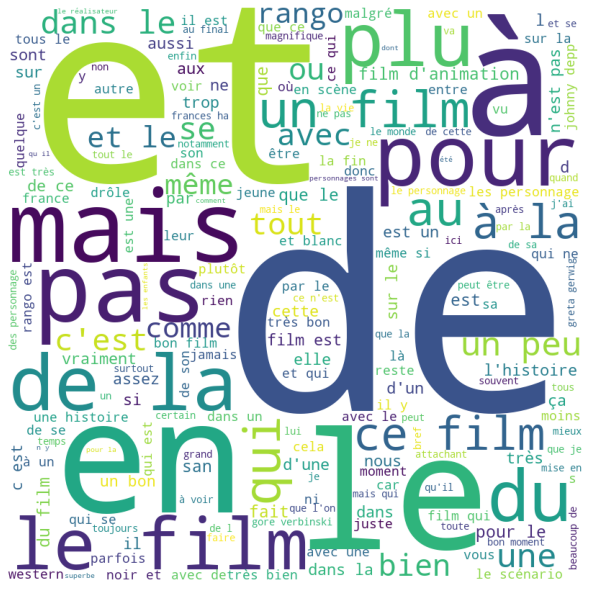

In [183]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_words))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_words_df_spaCy))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [172]:
cv = CountVectorizer()
word_count_vector_spaCy = cv.fit_transform(liste_all_words_df_spaCy)
tf_spaCy = pd.DataFrame(word_count_vector_spaCy.toarray(), columns=cv.get_feature_names())
tf_spaCy

000  007  10  100  1001  11  12  13  130  14  ...  êtes  être  êtres  \
0         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
1         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
2         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
3         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
4         0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
...     ...  ...  ..  ...   ...  ..  ..  ..  ...  ..  ...   ...   ...    ...   
184015    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
184016    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
184017    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
184018    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   
184019    0    0   0    0     0   0   0   0    0   0  ...     0     0      0   

        île  œil  œils  œufs  œuvre  œuvres  ǁǁ  
0         0    0     0     0      0       0   0  
1         0    0     0     0      0       0   0  
2         0    0     0     0      0       0   0  
3         0    0     0     0      0       0   0  
4         0    0     0     0      0       0   0  
...     ...  ...   ...   ...    ...     ...  ..  
184015    0    0     0     0      0       0   0  
184016    0    0     0     0      0       0   0  
184017    0    0     0     0      0       0   0  
184018    0    0     0     0      0       0   0  
184019    0    0     0     0      0       0   0  

[184020 rows x 13257 columns]

In [174]:
tf_spaCy.sum()

000        1
007        1
10        20
100        5
1001       1
          ..
œils       7
œufs       1
œuvre     40
œuvres     8
ǁǁ         2
Length: 13257, dtype: int64

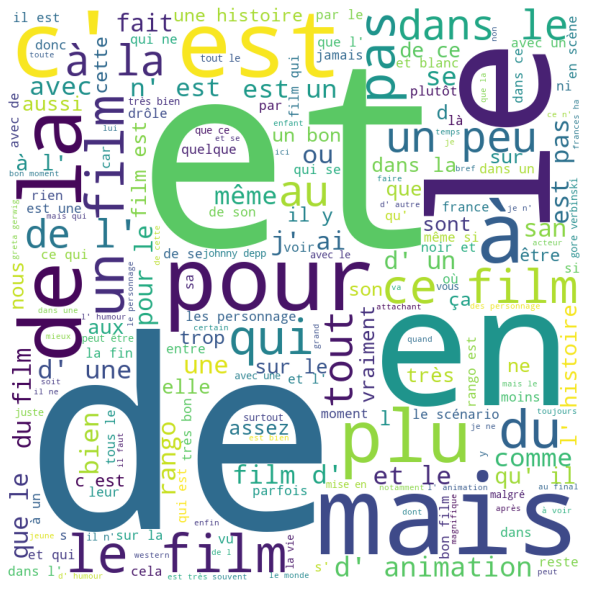

In [182]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_words_df_spaCy))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Réflexion sur la fréquence des mots
- les mots vides sont plus fréquents
- utils de garder les chiffres et les ponctuations?

#### Fréquence des tokens sans mots vides (plus intéressant)

In [159]:
liste_all_words_no_sw_df_nltk = []
for i in range(len(df)):
    for mot in df.token_without_sw.iloc[i]:
        liste_all_words_no_sw_df_nltk.append(str(mot).lower())

print(len(set(liste_all_words_no_sw_df_nltk)))

14652


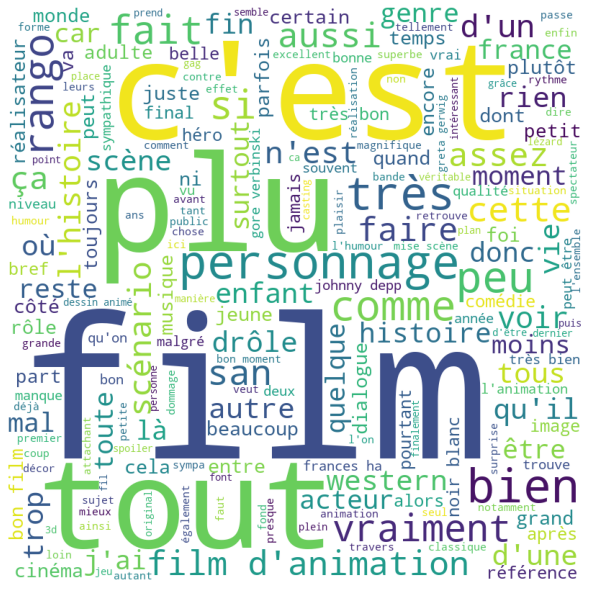

In [160]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_words_no_sw_df_nltk))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [157]:
liste_all_words_no_sw_df_spaCy = []
for i in range(len(df_spaCy)):
    for mot in df_spaCy.token_without_sw.iloc[i]:
        liste_all_words_no_sw_df_spaCy.append(str(mot).lower())

print(len(set(liste_all_words_no_sw_df_spaCy)))

11938


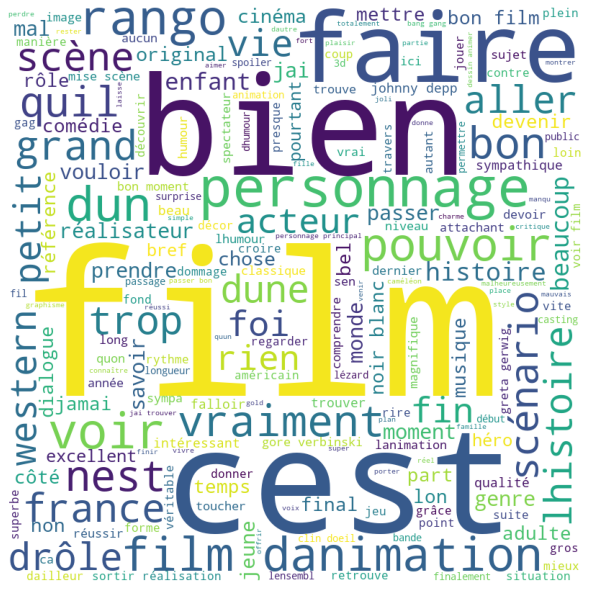

In [158]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_words_no_sw_df_spaCy))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Fréquence des lemmatisations

In [53]:
liste_all_lemm = []
for i in range(len(df_spaCy)):
    liste_all_lemm.extend(df_spaCy.lemm.iloc[i])
    
print(len(set(liste_all_lemm)))

12770


In [56]:
cv = CountVectorizer()
lemm_count_vector_spaCy = cv.fit_transform(liste_all_lemm)
tf_lemm_spaCy = pd.DataFrame(lemm_count_vector_spaCy.toarray(), columns=cv.get_feature_names())
tf_lemm_spaCy.sum()

007       1
05        2
10       17
100       5
1001      1
         ..
île       1
œil       2
œuf       1
œuvre    20
ǁǁ        2
Length: 12153, dtype: int64

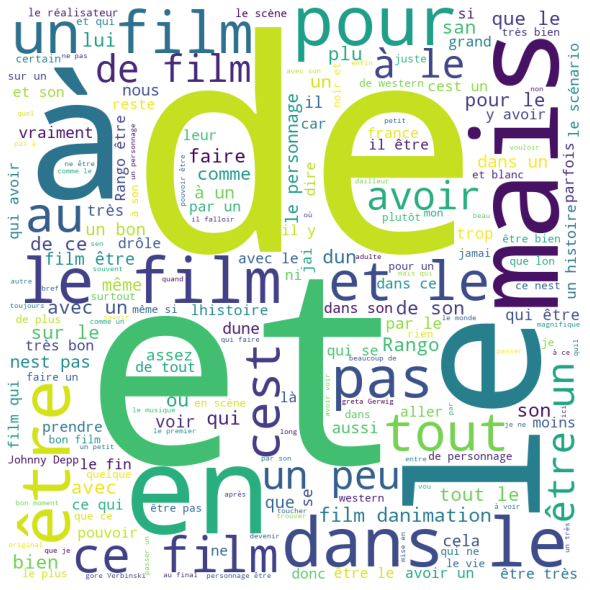

In [57]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_lemm))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Fréquence des racinisation

In [58]:
liste_all_racines = []
for i in range(len(df)):
    liste_all_racines.extend(df.racines.iloc[i])
    
print(len(set(liste_all_racines)))

11393


In [59]:
cv = CountVectorizer()
racines_count_vector_spaCy = cv.fit_transform(liste_all_racines)
tf_racines_nltk = pd.DataFrame(racines_count_vector_spaCy.toarray(), columns=cv.get_feature_names())
tf_racines_nltk.sum()

007      1
05       2
10      17
100      5
1001     1
        ..
île      1
œil     27
œuf      1
œuvr    36
ǁǁ       2
Length: 11357, dtype: int64

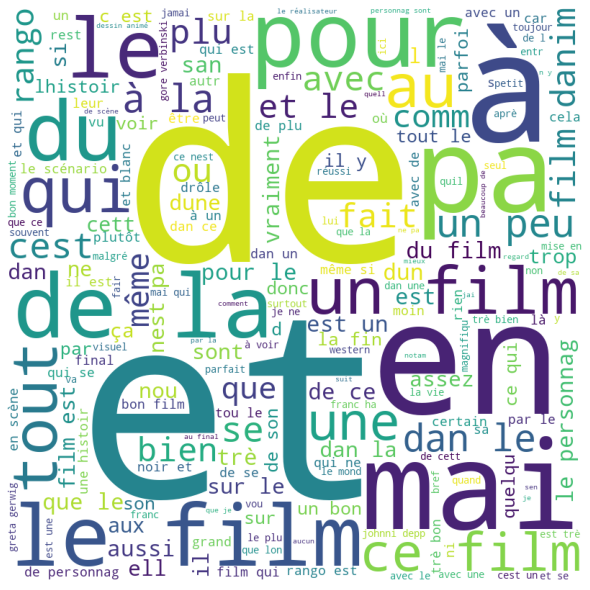

In [60]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_racines))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Fréquence des POS

In [63]:
liste_all_pos_nltk = []
for i in range(len(df)):
    liste_all_pos_nltk.extend([pos_tag[1] for pos_tag in df.pos_tag.iloc[0]])
    
print(len(set(liste_all_pos_nltk)))

13


In [64]:
cv = CountVectorizer()
count_vector_pos_tag_nltk = cv.fit_transform(liste_all_pos_nltk)
tf_pos_tag_nltk = pd.DataFrame(count_vector_pos_tag_nltk.toarray(), columns=cv.get_feature_names())
tf_pos_tag_nltk.sum()

cc       1511
fw      18132
in      16621
jj      39286
jjr      1511
jjs     12088
nn     148078
nnp     18132
nns     27198
rb       3022
vb       1511
vbp     13599
vbz      4533
dtype: int64

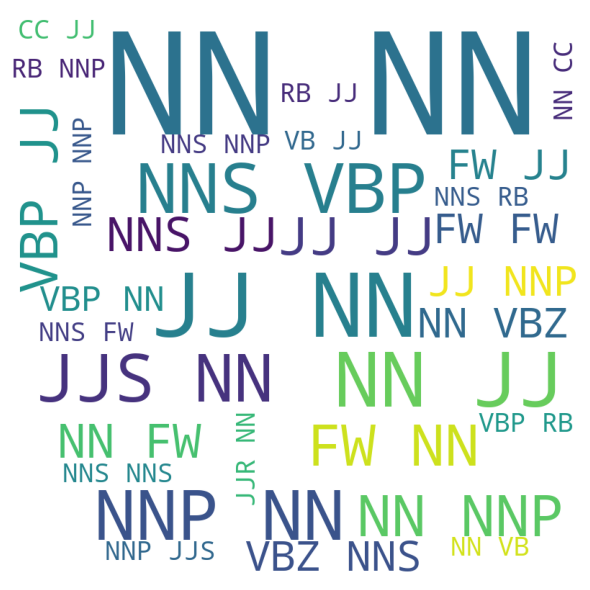

In [65]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_all_pos_nltk))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [69]:
liste_all_pos_spaCy = []
for i in range(len(df)):
    liste_all_pos_spaCy.extend([pos_tag[1] for pos_tag in df_spaCy.pos.iloc[0]])
    
print(len(set(liste_all_pos_spaCy)))

13


In [70]:
cv = CountVectorizer()
count_vector_pos_spacy = cv.fit_transform(liste_all_pos_spaCy)
tf_pos_tag_spacy = pd.DataFrame(count_vector_pos_spacy.toarray(), columns=cv.get_feature_names())
tf_pos_tag_spacy.sum()

adj      25687
adp      46841
adv      48352
aux      18132
cconj    10577
det      40797
noun     61951
pron     36264
propn     3022
punct    30220
sconj    10577
space     1511
verb     27198
dtype: int64

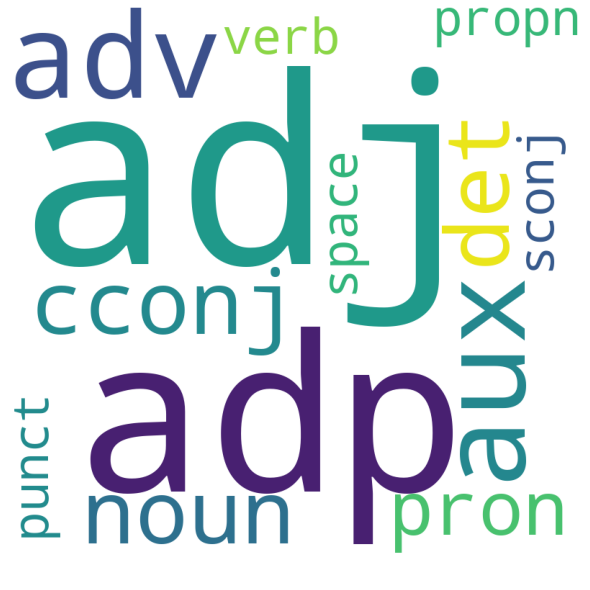

In [71]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(tf_pos_tag_spacy))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Question
Pourquoi le pos de Spacy ne correspond pas a celui de NLTK?

# Comment calculer ?
fréquence des concurrences (quel mot se répète le plus souvent avec quel mot ?).

In [4]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [5]:
s = 'i am not very used to programming and need some help to solve a problem. I have a .csv with 4 columns and about 5k rows, filled with questions and answers. I want to find word collocations in each cell.Starting point: Pandas dataframe with 4 columns and about 5k rows. (Id, Title, Body, Body2) Goal: Dataframe with 7 columns (Id, Title, Title-Collocations, Body, Body_Collocations, Body2, Body2-Collocations) and applied a function on each of its row I have found an example for Bigramm Collocation in the NLTK Documentation.'

In [6]:
words = s.split()

In [7]:
words

['i',
 'am',
 'not',
 'very',
 'used',
 'to',
 'programming',
 'and',
 'need',
 'some',
 'help',
 'to',
 'solve',
 'a',
 'problem.',
 'I',
 'have',
 'a',
 '.csv',
 'with',
 '4',
 'columns',
 'and',
 'about',
 '5k',
 'rows,',
 'filled',
 'with',
 'questions',
 'and',
 'answers.',
 'I',
 'want',
 'to',
 'find',
 'word',
 'collocations',
 'in',
 'each',
 'cell.Starting',
 'point:',
 'Pandas',
 'dataframe',
 'with',
 '4',
 'columns',
 'and',
 'about',
 '5k',
 'rows.',
 '(Id,',
 'Title,',
 'Body,',
 'Body2)',
 'Goal:',
 'Dataframe',
 'with',
 '7',
 'columns',
 '(Id,',
 'Title,',
 'Title-Collocations,',
 'Body,',
 'Body_Collocations,',
 'Body2,',
 'Body2-Collocations)',
 'and',
 'applied',
 'a',
 'function',
 'on',
 'each',
 'of',
 'its',
 'row',
 'I',
 'have',
 'found',
 'an',
 'example',
 'for',
 'Bigramm',
 'Collocation',
 'in',
 'the',
 'NLTK',
 'Documentation.']

In [8]:
finder = BigramCollocationFinder.from_words(words)

In [9]:
bgm = BigramAssocMeasures()
score = bgm.mi_like
collocations = {'_'.join(bigram): pmi for bigram, pmi in finder.score_ngrams(score)}

In [10]:
collocations

{'(Id,_Title,': 2.0,
 'about_5k': 2.0,
 '4_columns': 1.3333333333333333,
 'I_have': 1.3333333333333333,
 'Bigramm_Collocation': 1.0,
 'Body2)_Goal:': 1.0,
 'Body2,_Body2-Collocations)': 1.0,
 'Body_Collocations,_Body2,': 1.0,
 'Goal:_Dataframe': 1.0,
 'NLTK_Documentation.': 1.0,
 'Pandas_dataframe': 1.0,
 'am_not': 1.0,
 'an_example': 1.0,
 'cell.Starting_point:': 1.0,
 'example_for': 1.0,
 'find_word': 1.0,
 'for_Bigramm': 1.0,
 'found_an': 1.0,
 'function_on': 1.0,
 'i_am': 1.0,
 'its_row': 1.0,
 'need_some': 1.0,
 'not_very': 1.0,
 'of_its': 1.0,
 'point:_Pandas': 1.0,
 'rows,_filled': 1.0,
 'some_help': 1.0,
 'the_NLTK': 1.0,
 'very_used': 1.0,
 'with_4': 1.0,
 'word_collocations': 1.0,
 'and_about': 0.8,
 'columns_and': 0.5333333333333333,
 '5k_rows,': 0.5,
 '5k_rows.': 0.5,
 'Body,_Body2)': 0.5,
 'Body,_Body_Collocations,': 0.5,
 'Collocation_in': 0.5,
 'Title,_Title-Collocations,': 0.5,
 'Title-Collocations,_Body,': 0.5,
 'collocations_in': 0.5,
 'each_cell.Starting': 0.5,
 'eac

## 2. Pré-traitement sur des tweets politiques issus de la campagne d’évaluation DEFT 2017 (td1_tweets_data.txt)
- Répéter le travail précédent (a, b, c, d et e sous la nomenclature f, g, h, i, j).

In [72]:
# read text file and add it in a list 
with open ('td1_tweets_data.txt', encoding='utf-8') as file:
    list_tweets = file.readlines()

# create dataframe with this list
df_tweet_nltk = pd.DataFrame(list_tweets, columns = ['Tweet'])
df_tweet_nltk.head()

Tweet
0  Rencontre avec Dodo La Saumure : «Je ne connai...
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...
2  2011 année noire pour la PQR, seuls 2 quotidie...
3  "Le procès civil de l'affaire #DSK, dans le Br...
4  Heureusement que le candidat n'est pas DSK car...

In [73]:
len(df_tweet_nltk)

3906

### f) Vous devez pré-traiter les données avec NLTK selon les processus suivants en premier lieu : segmentation en phrases et en mots, racinisation, suppression des mots vides.

#### Segmentation en phrases

In [77]:
# tokenize all comments and add them into the dataframe as a columnb
tweets_phrases_nltk = []
for i in range(len(df_tweet_nltk)):
    tweets_phrases_nltk.append(nltk.sent_tokenize(df_tweet_nltk.Tweet[i]))
    
df_tweet_nltk["phrases"] = tweets_phrases_nltk
df_tweet_nltk.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  
0  [Rencontre avec Dodo La Saumure : «Je ne conna...  
1  [Galère du dimanche matin: sur DSK,Marthe, 6 a...  
2  [2011 année noire pour la PQR, seuls 2 quotidi...  
3  ["Le procès civil de l'affaire #DSK, dans le B...  
4  [Heureusement que le candidat n'est pas DSK ca...

In [84]:
len(df_tweet_nltk.phrases.iloc[1])

# il y a generalement 1 phrase par tweet

2

#### Segmentation en mots

supprimer directement les ponctuations

In [89]:
from nltk.tokenize import RegexpTokenizer

In [90]:
# tokenize all comments in words and add them into the dataframe as a column
tweets_mots_nltk = []
tokenizer = RegexpTokenizer(r'\w+')

for i in range(len(df_tweet_nltk)):
    tweets_mots_nltk.append(tokenizer.tokenize(df_tweet_nltk.Tweet[i]))
    
df_tweet_nltk["mots"] = tweets_mots_nltk
df_tweet_nltk.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [Rencontre avec Dodo La Saumure : «Je ne conna...   
1  [Galère du dimanche matin: sur DSK,Marthe, 6 a...   
2  [2011 année noire pour la PQR, seuls 2 quotidi...   
3  ["Le procès civil de l'affaire #DSK, dans le B...   
4  [Heureusement que le candidat n'est pas DSK ca...   

                                                mots  
0  [Rencontre, avec, Dodo, La, Saumure, Je, ne, c...  
1  [Galère, du, dimanche, matin, sur, DSK, Marthe...  
2  [2011, année, noire, pour, la, PQR, seuls, 2, ...  
3  [Le, procès, civil, de, l, affaire, DSK, dans,...  
4  [Heureusement, que, le, candidat, n, est, pas,...

In [91]:
df_tweet_nltk.mots.iloc[0]

['Rencontre',
 'avec',
 'Dodo',
 'La',
 'Saumure',
 'Je',
 'ne',
 'connais',
 'pas',
 'DSK',
 'mais',
 'j',
 'aurais',
 'aimé',
 'le',
 'rencontrer',
 'http',
 'bit',
 'ly',
 'xsc2yb',
 'carlton']

#### Racinisation

In [95]:
tweets_racines_nltk = []

ps = PorterStemmer()
for mots in tweets_mots_nltk:
    l_tmp = []
    for mot in mots:
        l_tmp.append(ps.stem(mot.lower()))
        
    tweets_racines_nltk.append(l_tmp)
        
df_tweet_nltk["racines"] = tweets_racines_nltk
df_tweet_nltk.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [Rencontre avec Dodo La Saumure : «Je ne conna...   
1  [Galère du dimanche matin: sur DSK,Marthe, 6 a...   
2  [2011 année noire pour la PQR, seuls 2 quotidi...   
3  ["Le procès civil de l'affaire #DSK, dans le B...   
4  [Heureusement que le candidat n'est pas DSK ca...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, Je, ne, c...   
1  [Galère, du, dimanche, matin, sur, DSK, Marthe...   
2  [2011, année, noire, pour, la, PQR, seuls, 2, ...   
3  [Le, procès, civil, de, l, affaire, DSK, dans,...   
4  [Heureusement, que, le, candidat, n, est, pas,...   

                                             racines  
0  [rencontr, avec, dodo, la, saumur, je, ne, con...  
1  [galèr, du, dimanch, matin, sur, dsk, marth, 6...  
2  [2011, anné, noir, pour, la, pqr, seul, 2, quo...  
3  [le, procè, civil, de, l, affair, dsk, dan, le...  
4  [heureus, que, le, candidat, n, est, pa, dsk, ...

In [118]:
df_tweet_nltk.racines.iloc[0]

['rencontr',
 'avec',
 'dodo',
 'la',
 'saumur',
 'je',
 'ne',
 'connai',
 'pa',
 'dsk',
 'mai',
 'j',
 'aurai',
 'aimé',
 'le',
 'rencontr',
 'http',
 'bit',
 'ly',
 'xsc2yb',
 'carlton']

#### Suppression des mots vides.

In [96]:
tweets_tokens_without_sw_nltk = []
for i in range(len(df_tweet_nltk)):
    tweets_tokens_without_sw_nltk.append(remove_stopwords(df_tweet_nltk.mots.iloc[i], fr_stopwords))
    
df_tweet_nltk['token_without_sw'] = tweets_tokens_without_sw_nltk
df_tweet_nltk.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [Rencontre avec Dodo La Saumure : «Je ne conna...   
1  [Galère du dimanche matin: sur DSK,Marthe, 6 a...   
2  [2011 année noire pour la PQR, seuls 2 quotidi...   
3  ["Le procès civil de l'affaire #DSK, dans le B...   
4  [Heureusement que le candidat n'est pas DSK ca...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, Je, ne, c...   
1  [Galère, du, dimanche, matin, sur, DSK, Marthe...   
2  [2011, année, noire, pour, la, PQR, seuls, 2, ...   
3  [Le, procès, civil, de, l, affaire, DSK, dans,...   
4  [Heureusement, que, le, candidat, n, est, pas,...   

                                             racines  \
0  [rencontr, avec, dodo, la, saumur, je, ne, con...   
1  [galèr, du, dimanch, matin, sur, dsk, marth, 6...   
2  [2011, anné, noir, pour, la, pqr, seul, 2, quo...   
3  [le, procè, civil, de, l, affair, dsk, dan, le...   
4  [heureus, que, le, candidat, n, est, pa, dsk, ...   

                                    token_without_sw  
0  [rencontre, dodo, saumure, connais, dsk, aimé,...  
1  [galère, dimanche, matin, dsk, marthe, 6, ans,...  
2  [2011, année, noire, pqr, seuls, 2, quotidiens...  
3  [procès, civil, affaire, dsk, bronx, lieu, ava...  
4  [heureusement, candidat, dsk, car, lettres, ds...

### g) Proposez un étiquetage morpho-syntaxique (POS tagging). Attention à bien réfléchir à quel niveau de normalisation vous devez l’appliquer.

In [97]:
# NLTK

# pos tag sans changer les lettres en majuscule
tweets_pos_tag_nltk = []

for i in range(len(df_tweet_nltk)):
    tweets_pos_tag_nltk.append(nltk.pos_tag(df_tweet_nltk.mots.iloc[i]))
    
df_tweet_nltk['pos_tag'] = tweets_pos_tag_nltk
df_tweet_nltk.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [Rencontre avec Dodo La Saumure : «Je ne conna...   
1  [Galère du dimanche matin: sur DSK,Marthe, 6 a...   
2  [2011 année noire pour la PQR, seuls 2 quotidi...   
3  ["Le procès civil de l'affaire #DSK, dans le B...   
4  [Heureusement que le candidat n'est pas DSK ca...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, Je, ne, c...   
1  [Galère, du, dimanche, matin, sur, DSK, Marthe...   
2  [2011, année, noire, pour, la, PQR, seuls, 2, ...   
3  [Le, procès, civil, de, l, affaire, DSK, dans,...   
4  [Heureusement, que, le, candidat, n, est, pas,...   

                                             racines  \
0  [rencontr, avec, dodo, la, saumur, je, ne, con...   
1  [galèr, du, dimanch, matin, sur, dsk, marth, 6...   
2  [2011, anné, noir, pour, la, pqr, seul, 2, quo...   
3  [le, procè, civil, de, l, affair, dsk, dan, le...   
4  [heureus, que, le, candidat, n, est, pa, dsk, ...   

                                    token_without_sw  \
0  [rencontre, dodo, saumure, connais, dsk, aimé,...   
1  [galère, dimanche, matin, dsk, marthe, 6, ans,...   
2  [2011, année, noire, pqr, seuls, 2, quotidiens...   
3  [procès, civil, affaire, dsk, bronx, lieu, ava...   
4  [heureusement, candidat, dsk, car, lettres, ds...   

                                             pos_tag  
0  [(Rencontre, NNP), (avec, NN), (Dodo, NNP), (L...  
1  [(Galère, NNP), (du, NN), (dimanche, NN), (mat...  
2  [(2011, CD), (année, NN), (noire, CC), (pour, ...  
3  [(Le, NNP), (procès, VBP), (civil, JJ), (de, F...  
4  [(Heureusement, NNP), (que, NN), (le, NN), (ca...

In [99]:
df_tweet_nltk.pos_tag.iloc[0]

[('Rencontre', 'NNP'),
 ('avec', 'NN'),
 ('Dodo', 'NNP'),
 ('La', 'NNP'),
 ('Saumure', 'NNP'),
 ('Je', 'NNP'),
 ('ne', 'MD'),
 ('connais', 'VB'),
 ('pas', 'JJ'),
 ('DSK', 'NNP'),
 ('mais', 'NN'),
 ('j', 'NN'),
 ('aurais', 'NN'),
 ('aimé', 'NN'),
 ('le', 'JJ'),
 ('rencontrer', 'NN'),
 ('http', 'NN'),
 ('bit', 'NN'),
 ('ly', 'JJ'),
 ('xsc2yb', 'NNP'),
 ('carlton', 'NN')]

### h) De la même façon, effectuez ces différents traitements avec SpaCy (attention pas de stemming sous spaCy, donc ne pas faire ce traitement, mais faire la lemmatisation à la place).

#### Segmentation en phrases spacy

In [100]:
df_tweet_spacy = df_tweet_nltk[['Tweet']]
df_tweet_spacy.head()

Tweet
0  Rencontre avec Dodo La Saumure : «Je ne connai...
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...
2  2011 année noire pour la PQR, seuls 2 quotidie...
3  "Le procès civil de l'affaire #DSK, dans le Br...
4  Heureusement que le candidat n'est pas DSK car...

In [101]:
tweet_phrases_spaCy = []

for i in range(len(df_tweet_spacy)):
    doc = nlp(df_tweet_spacy.Tweet.iloc[i])
    l_tmp = []
    for sent in doc.sents:
        l_tmp.append(sent)
    tweet_phrases_spaCy.append(l_tmp)
    
df_tweet_spacy['phrases'] = tweet_phrases_spaCy
df_tweet_spacy.head()

<ipython-input-101-fa0ae4be67a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_spacy['phrases'] = tweet_phrases_spaCy


Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  
0  [(Rencontre, avec, Dodo), (La, Saumure, :, «),...  
1  [(Galère, du, dimanche, matin, :, sur, DSK, ,,...  
2  [(2011, année, noire, pour, la, PQR, ,, seuls,...  
3  [(", Le, procès, civil, de, l', affaire), (#),...  
4  [(Heureusement, que, le, candidat, n', est, pa...

In [103]:
df_tweet_spacy.phrases.iloc[1]

[Galère du dimanche matin: sur DSK,Marthe, 6 ans : "il veut faire des calins à tout le monde, pourquoi il pas être président?,
 ".,
 Parce que!,
 ]

#### Segmentation en mots spaCy

In [104]:
# tokenize all comments in words and add them into the dataframe as a column
tweet_mots_spaCy = []
for i in range(len(df_tweet_spacy)):
    l_tmp = []
    doc = nlp(df_tweet_spacy.Tweet.iloc[i])
    for token in doc:
        l_tmp.append(token)
    tweet_mots_spaCy.append(l_tmp)
    
df_tweet_spacy["mots"] = tweet_mots_spaCy
df_tweet_spacy.head()

<ipython-input-104-432ebd4b0b0e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_spacy["mots"] = tweet_mots_spaCy


Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [(Rencontre, avec, Dodo), (La, Saumure, :, «),...   
1  [(Galère, du, dimanche, matin, :, sur, DSK, ,,...   
2  [(2011, année, noire, pour, la, PQR, ,, seuls,...   
3  [(", Le, procès, civil, de, l', affaire), (#),...   
4  [(Heureusement, que, le, candidat, n', est, pa...   

                                                mots  
0  [Rencontre, avec, Dodo, La, Saumure, :, «, Je,...  
1  [Galère, du, dimanche, matin, :, sur, DSK, ,, ...  
2  [2011, année, noire, pour, la, PQR, ,, seuls, ...  
3  [", Le, procès, civil, de, l', affaire, #, DSK...  
4  [Heureusement, que, le, candidat, n', est, pas...

In [106]:
df_tweet_spacy.mots.iloc[2]

[2011,
 année,
 noire,
 pour,
 la,
 PQR,
 ,,
 seuls,
 2,
 quotidiens,
 régionaux,
 n',
 ont,
 pas,
 vu,
 leurs,
 ventes,
 baisser,
 …,
 Tout,
 le,
 ",
 palmarès,
 ",
 ici,
 :,
 http://bit.ly/yFuLml,
 ]

#### Lemmatisation spaCy

In [107]:
tweets_lemm_spaCy = []
for i in range(len(df_tweet_spacy)):
    l_tmp = []
    tweet_sans_ponc = re.sub(r'[^\w\s]', '', df_tweet_spacy.Tweet.iloc[i])
    doc = nlp(tweet_sans_ponc)
    for token in doc:
        l_tmp.append(token.lemma_)
    tweets_lemm_spaCy.append(l_tmp)
    
df_tweet_spacy["lemm"] = tweets_lemm_spaCy
df_tweet_spacy.head()

<ipython-input-107-2c81453aa250>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_spacy["lemm"] = tweets_lemm_spaCy


Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [(Rencontre, avec, Dodo), (La, Saumure, :, «),...   
1  [(Galère, du, dimanche, matin, :, sur, DSK, ,,...   
2  [(2011, année, noire, pour, la, PQR, ,, seuls,...   
3  [(", Le, procès, civil, de, l', affaire), (#),...   
4  [(Heureusement, que, le, candidat, n', est, pa...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, :, «, Je,...   
1  [Galère, du, dimanche, matin, :, sur, DSK, ,, ...   
2  [2011, année, noire, pour, la, PQR, ,, seuls, ...   
3  [", Le, procès, civil, de, l', affaire, #, DSK...   
4  [Heureusement, que, le, candidat, n', est, pas...   

                                                lemm  
0  [rencontre, avec, Dodo, le, saumure,  , je, ne...  
1  [galère, de, dimanche, matin, sur, dskmarthe, ...  
2  [2011, année, noir, pour, le, pqr, seul, 2, qu...  
3  [le, procès, civil, de, laffaire, dsk, dans, l...  
4  [heureusement, que, le, candidat, nest, pas, d...

In [110]:
df_tweet_spacy.lemm.iloc[2]

['2011',
 'année',
 'noir',
 'pour',
 'le',
 'pqr',
 'seul',
 '2',
 'quotidien',
 'régional',
 'nont',
 'pas',
 'voir',
 'leur',
 'vente',
 'baisser',
 'tout',
 'le',
 'palmarès',
 'ici',
 ' ',
 'httpbitlyyfulml',
 '\n']

#### suppression des mots vides spaCy

In [114]:
tweets_tokens_without_sw_spaCy = []
for i in range(len(df_tweet_spacy)):
    l_tmp = []
    docw = nlp(" ".join(df_tweet_spacy.lemm.iloc[i]))
    for token in docw:
        if not token.is_stop:
            l_tmp.append(token)
    tweets_tokens_without_sw_spaCy.append(l_tmp)
    
df_tweet_spacy['token_without_sw'] = tweets_tokens_without_sw_spaCy
df_tweet_spacy.head()

<ipython-input-114-4a769852efbf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_spacy['token_without_sw'] = tweets_tokens_without_sw_spaCy


Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [(Rencontre, avec, Dodo), (La, Saumure, :, «),...   
1  [(Galère, du, dimanche, matin, :, sur, DSK, ,,...   
2  [(2011, année, noire, pour, la, PQR, ,, seuls,...   
3  [(", Le, procès, civil, de, l', affaire), (#),...   
4  [(Heureusement, que, le, candidat, n', est, pa...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, :, «, Je,...   
1  [Galère, du, dimanche, matin, :, sur, DSK, ,, ...   
2  [2011, année, noire, pour, la, PQR, ,, seuls, ...   
3  [", Le, procès, civil, de, l', affaire, #, DSK...   
4  [Heureusement, que, le, candidat, n', est, pas...   

                                                lemm  \
0  [rencontre, avec, Dodo, le, saumure,  , je, ne...   
1  [galère, de, dimanche, matin, sur, dskmarthe, ...   
2  [2011, année, noir, pour, le, pqr, seul, 2, qu...   
3  [le, procès, civil, de, laffaire, dsk, dans, l...   
4  [heureusement, que, le, candidat, nest, pas, d...   

                                    token_without_sw  
0  [rencontre, Dodo, saumure,   , connaître, dsk,...  
1  [galère, dimanche, matin, dskmarthe, 6, an,   ...  
2  [2011, année, noir, pqr, 2, quotidien, régiona...  
3  [procès, civil, laffaire, dsk, bron, naurer, l...  
4  [heureusement, candidat, nest, dsk, lettre, ds...

In [115]:
df_tweet_spacy.token_without_sw.iloc[0]

[rencontre,
 Dodo,
 saumure,
   ,
 connaître,
 dsk,
 jaurai,
 aimer,
 rencontrer,
   ,
 httpbitlyxsc2yb,
 carlton,
 ]

#### Proposez un étiquetage morpho-syntaxique (POS tagging). Attention à bien réfléchir à quel niveau de normalisation vous devez l’appliquer.

In [116]:
tweets_pos_spaCy = []
for i in range(len(df_tweet_spacy)):
    l_tmp = []
    doc = nlp(df_tweet_spacy.Tweet.iloc[i])
    for token in doc:
        l_tmp.append((token.text, token.pos_))
    tweets_pos_spaCy.append(l_tmp)
    
df_tweet_spacy["pos"] = tweets_pos_spaCy
df_tweet_spacy.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [(Rencontre, avec, Dodo), (La, Saumure, :, «),...   
1  [(Galère, du, dimanche, matin, :, sur, DSK, ,,...   
2  [(2011, année, noire, pour, la, PQR, ,, seuls,...   
3  [(", Le, procès, civil, de, l', affaire), (#),...   
4  [(Heureusement, que, le, candidat, n', est, pa...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, :, «, Je,...   
1  [Galère, du, dimanche, matin, :, sur, DSK, ,, ...   
2  [2011, année, noire, pour, la, PQR, ,, seuls, ...   
3  [", Le, procès, civil, de, l', affaire, #, DSK...   
4  [Heureusement, que, le, candidat, n', est, pas...   

                                                lemm  \
0  [rencontre, avec, Dodo, le, saumure,  , je, ne...   
1  [galère, de, dimanche, matin, sur, dskmarthe, ...   
2  [2011, année, noir, pour, le, pqr, seul, 2, qu...   
3  [le, procès, civil, de, laffaire, dsk, dans, l...   
4  [heureusement, que, le, candidat, nest, pas, d...   

                                    token_without_sw  \
0  [rencontre, Dodo, saumure,   , connaître, dsk,...   
1  [galère, dimanche, matin, dskmarthe, 6, an,   ...   
2  [2011, année, noir, pqr, 2, quotidien, régiona...   
3  [procès, civil, laffaire, dsk, bron, naurer, l...   
4  [heureusement, candidat, nest, dsk, lettre, ds...   

                                                 pos  
0  [(Rencontre, NOUN), (avec, ADP), (Dodo, PROPN)...  
1  [(Galère, NOUN), (du, ADP), (dimanche, NOUN), ...  
2  [(2011, NUM), (année, NOUN), (noire, ADJ), (po...  
3  [(", PUNCT), (Le, DET), (procès, NOUN), (civil...  
4  [(Heureusement, ADV), (que, SCONJ), (le, DET),...

In [117]:
df_tweet_spacy.pos.iloc[0]

[('Rencontre', 'NOUN'),
 ('avec', 'ADP'),
 ('Dodo', 'PROPN'),
 ('La', 'DET'),
 ('Saumure', 'NOUN'),
 (':', 'PUNCT'),
 ('«', 'PUNCT'),
 ('Je', 'PRON'),
 ('ne', 'ADV'),
 ('connais', 'VERB'),
 ('pas', 'ADV'),
 ('#', 'NOUN'),
 ('DSK', 'NOUN'),
 (',', 'PUNCT'),
 ('mais', 'CCONJ'),
 ("j'", 'PRON'),
 ('aurais', 'VERB'),
 ('aimé', 'VERB'),
 ('le', 'PRON'),
 ('rencontrer', 'VERB'),
 ('»', 'PUNCT'),
 ('http://bit.ly/xsc2yb', 'DET'),
 ('#', 'NOUN'),
 ('carlton', 'NOUN'),
 ('\n', 'SPACE')]

### i) Comparez les résultats obtenus avec les différentes bibliothèques : celles-ci produisent-elles les mêmes résultats ? Quelle bibliothèque est la plus rapide à traiter les données ? Quelle est la plus performante ?

Réponse: 
* Pareil que les commentaires, NLTK ségmente mieux les phrases. NLTK propose de ségmenter les mots en supprimant les ponctuation en même temps.
* NLTK est toujours plus rapide.

### j) Proposez des statistiques sur les résultats obtenus par chaque librairie : 
- nombre de mots, nombre de phrases, 
- fréquence des mots (et lemmatisation, POS, racinisation…), 
- fréquence des concurrences (quel mot se répète le plus souvent avec quel mot ?).

#### Le nombre des mots

In [119]:
liste_all_words_tweets_nltk = []
for i in range(len(df_tweet_nltk)):
    for mot in df_tweet_nltk.mots.iloc[i]:
        liste_all_words_tweets_nltk.append(mot.lower())
print(len(set(liste_all_words_tweets_nltk)))

13046


In [120]:
liste_all_words_tweets_spaCy = []
for i in range(len(df_tweet_spacy)):
    for mot in df_tweet_spacy.mots.iloc[i]:
        liste_all_words_tweets_spaCy.append(str(mot).lower())

print(len(set(liste_all_words_tweets_spaCy)))

12395


# Pourquoi moins de mots avec spacy?

#### Le nombre des phrases

In [121]:
nb_phrases_tweets_nltk = 0

for i in range(len(df_tweet_nltk)):
    nb_phrases_tweets_nltk += len(df_tweet_nltk.phrases.iloc[0])

nb_phrases_tweets_nltk

3906

In [123]:
nb_phrases_tweets_spaCy = 0

for i in range(len(df_spaCy)):
    nb_phrases_tweets_spaCy += len(df_tweet_spacy.phrases.iloc[0])

nb_phrases_tweets_spaCy

7555

#### Fréquence des mots

In [126]:
def calculate_tf(liste_a_calculer):
    cv = CountVectorizer()
    word_count_vector = cv.fit_transform(liste_a_calculer)
    tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
    return tf.sum()

In [127]:
calculate_tf(liste_all_words_tweets_nltk)

00           2
000         47
000e         1
000vince     1
001          2
            ..
ôn           1
œil          2
œuvre        1
⁰mais        1
⁰nous        1
Length: 13007, dtype: int64

In [130]:
def show_words_cloud(liste_a_calculer):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(','.join(liste_a_calculer))
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

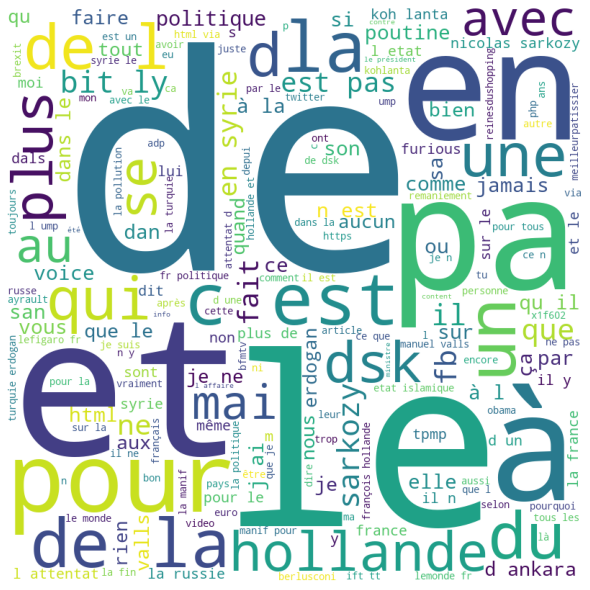

In [131]:
show_words_cloud(liste_all_words_tweets_nltk)

In [134]:
calculate_tf(liste_all_words_tweets_spaCy)

00           2
000         47
000e         1
000vince     1
001          2
            ..
ôn           1
œil          2
œuvre        1
⁰mais        1
⁰nous        1
Length: 13002, dtype: int64

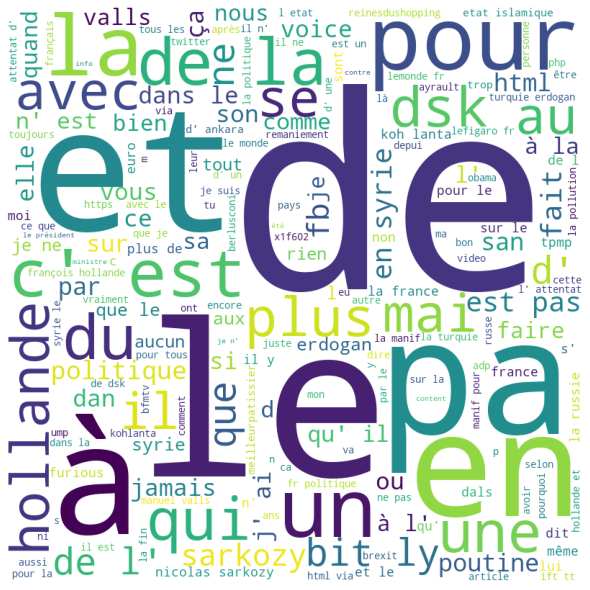

In [135]:
show_words_cloud(liste_all_words_tweets_spaCy)

#### Fréquence des mots sans mots vides

In [138]:
df_tweet_spacy.head()

Tweet  \
0  Rencontre avec Dodo La Saumure : «Je ne connai...   
1  Galère du dimanche matin: sur DSK,Marthe, 6 an...   
2  2011 année noire pour la PQR, seuls 2 quotidie...   
3  "Le procès civil de l'affaire #DSK, dans le Br...   
4  Heureusement que le candidat n'est pas DSK car...   

                                             phrases  \
0  [(Rencontre, avec, Dodo), (La, Saumure, :, «),...   
1  [(Galère, du, dimanche, matin, :, sur, DSK, ,,...   
2  [(2011, année, noire, pour, la, PQR, ,, seuls,...   
3  [(", Le, procès, civil, de, l', affaire), (#),...   
4  [(Heureusement, que, le, candidat, n', est, pa...   

                                                mots  \
0  [Rencontre, avec, Dodo, La, Saumure, :, «, Je,...   
1  [Galère, du, dimanche, matin, :, sur, DSK, ,, ...   
2  [2011, année, noire, pour, la, PQR, ,, seuls, ...   
3  [", Le, procès, civil, de, l', affaire, #, DSK...   
4  [Heureusement, que, le, candidat, n', est, pas...   

                                                lemm  \
0  [rencontre, avec, Dodo, le, saumure,  , je, ne...   
1  [galère, de, dimanche, matin, sur, dskmarthe, ...   
2  [2011, année, noir, pour, le, pqr, seul, 2, qu...   
3  [le, procès, civil, de, laffaire, dsk, dans, l...   
4  [heureusement, que, le, candidat, nest, pas, d...   

                                    token_without_sw  \
0  [rencontre, Dodo, saumure,   , connaître, dsk,...   
1  [galère, dimanche, matin, dskmarthe, 6, an,   ...   
2  [2011, année, noir, pqr, 2, quotidien, régiona...   
3  [procès, civil, laffaire, dsk, bron, naurer, l...   
4  [heureusement, candidat, nest, dsk, lettre, ds...   

                                                 pos  
0  [(Rencontre, NOUN), (avec, ADP), (Dodo, PROPN)...  
1  [(Galère, NOUN), (du, ADP), (dimanche, NOUN), ...  
2  [(2011, NUM), (année, NOUN), (noire, ADJ), (po...  
3  [(", PUNCT), (Le, DET), (procès, NOUN), (civil...  
4  [(Heureusement, ADV), (que, SCONJ), (le, DET),...

In [133]:
liste_all_words_no_sw_tweets_nltk = []
for i in range(len(df_tweet_nltk)):
    for mot in df_tweet_nltk.token_without_sw.iloc[i]:
        liste_all_words_no_sw_tweets_nltk.append(mot.lower())
print(len(set(liste_all_words_no_sw_tweets_nltk)))

12924


In [136]:
calculate_tf(liste_all_words_no_sw_tweets_nltk)

00           2
000         47
000e         1
000vince     1
001          2
            ..
ôn           1
œil          2
œuvre        1
⁰mais        1
⁰nous        1
Length: 12895, dtype: int64

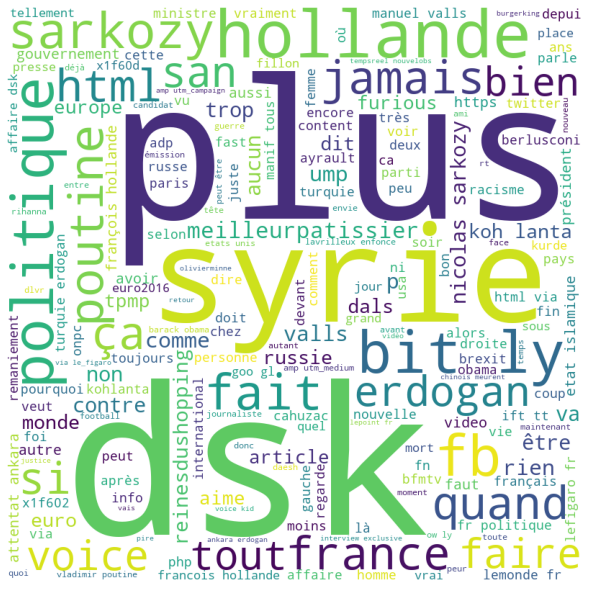

In [137]:
show_words_cloud(liste_all_words_no_sw_tweets_nltk)

# /!\Spacy chiffre = int, NLTK chiffre = str

In [140]:
liste_all_words_no_sw_tweets_spaCy = []
for i in range(len(df_tweet_spacy)):
    for mot in df_tweet_spacy.token_without_sw.iloc[i]:
        liste_all_words_no_sw_tweets_spaCy.append(str(mot).lower())
print(len(set(liste_all_words_no_sw_tweets_spaCy)))

11354


In [141]:
calculate_tf(liste_all_words_no_sw_tweets_spaCy)

00           1
000         27
000vince     1
01           1
0156am       1
            ..
êtesvous     1
ôn           1
œil          1
⁰mais        1
⁰nou         1
Length: 11312, dtype: int64

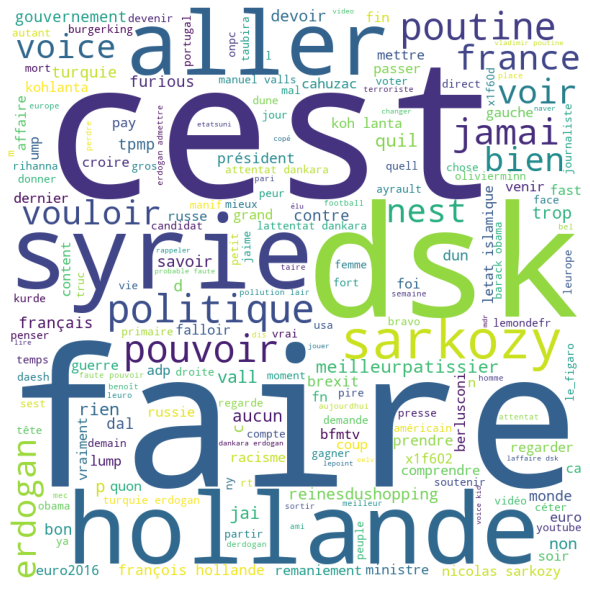

In [142]:
show_words_cloud(liste_all_words_no_sw_tweets_spaCy)

#### Fréquence des lemmatisations

In [144]:
tweets_all_lemm_spacy = []
for i in range(len(df_tweet_nltk)):
    tweets_all_lemm_spacy.extend(df_tweet_spacy.lemm.iloc[i])
    
print(len(set(tweets_all_lemm_spacy)))

12337


In [146]:
calculate_tf(tweets_all_lemm_spacy)

00            1
000          27
000vince      1
01            1
0156am        1
           ... 
être        899
ôn            1
œil           1
⁰mais         1
⁰nou          1
Length: 11546, dtype: int64

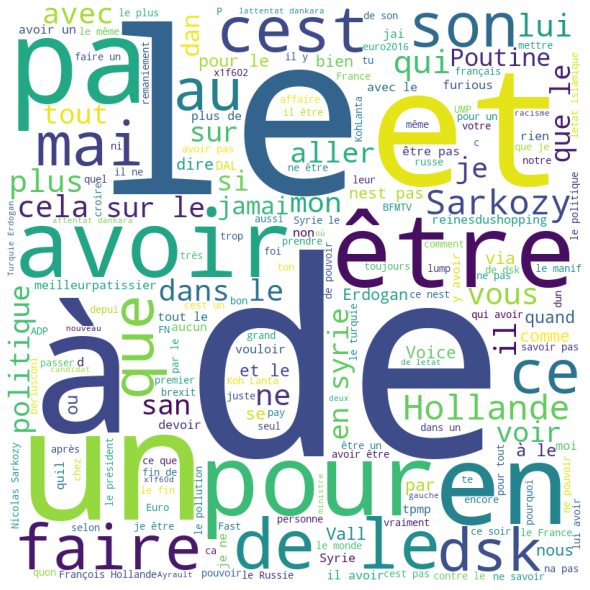

In [147]:
show_words_cloud(tweets_all_lemm_spacy)

#### Fréquence des racinisation

In [148]:
tweets_all_racines_nltk = []
for i in range(len(df_tweet_nltk)):
    tweets_all_racines_nltk.extend(df_tweet_nltk.racines.iloc[i])
    
print(len(set(tweets_all_racines_nltk)))

11633


In [149]:
calculate_tf(tweets_all_racines_nltk)

00          2
000        47
000e        1
000vinc     1
001         2
           ..
ôn          1
œil         2
œuvr        1
⁰mai        1
⁰nou        1
Length: 11594, dtype: int64

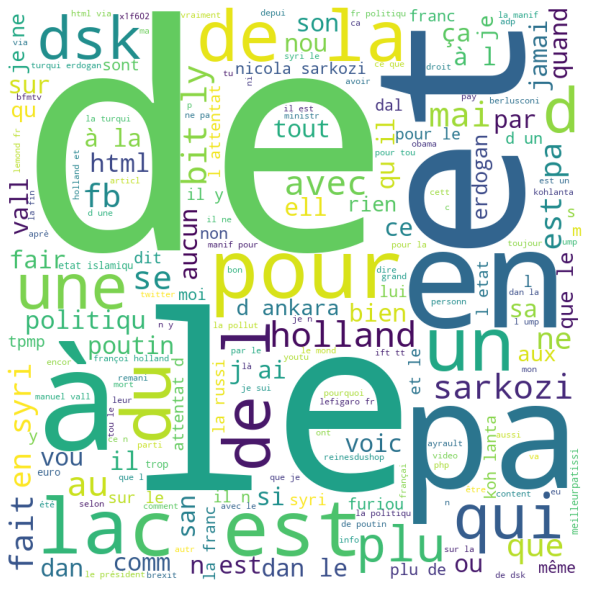

In [150]:
show_words_cloud(tweets_all_racines_nltk)

#### Fréquence des POS

In [151]:
tweets_all_pos_nltk = []
for i in range(len(df_tweet_nltk)):
    tweets_all_pos_nltk.extend([pos_tag[1] for pos_tag in df_tweet_nltk.pos_tag.iloc[0]])
    
print(len(set(tweets_all_pos_nltk)))

5


In [152]:
calculate_tf(tweets_all_pos_nltk)

jj     11718
md      3906
nn     35154
nnp    27342
vb      3906
dtype: int64

In [153]:
tweets_all_pos_spaCy = []
for i in range(len(df)):
    tweets_all_pos_spaCy.extend([pos_tag[1] for pos_tag in df_tweet_spacy.pos.iloc[0]])
    
print(len(set(tweets_all_pos_spaCy)))

10


In [154]:
calculate_tf(tweets_all_pos_spaCy)

adp      1511
adv      3022
cconj    1511
det      3022
noun     9066
pron     4533
propn    1511
punct    6044
space    1511
verb     6044
dtype: int64

### Fréquence des concurrences (quel mot se répète le plus souvent avec quel mot ?)

### k) Quelles différences observez-vous entre les 2 corpus ?

Réponse :
* Les commentaires parlent plus de films, alors que les tweets parlent des évènements politiques et culturels.